In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [46]:
bank = pd.read_csv("bank-marketing.csv")

In [47]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [48]:
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [49]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
bank['response']= bank.response.map({'yes' : 1, 'no':0})

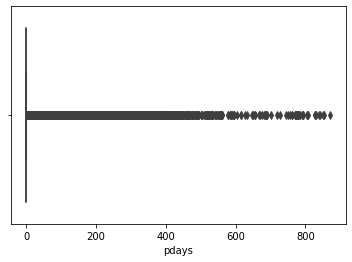

In [51]:
sns.boxplot('pdays',data=bank)

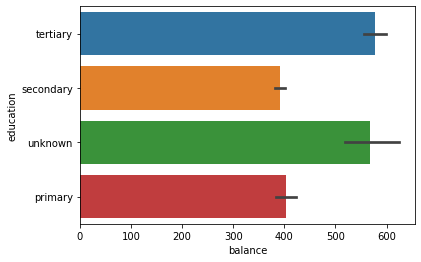

In [52]:
from numpy import median
sns.barplot(x='balance',y='education',data=bank,estimator=median)

In [53]:
bank.groupby(['education']).median()['balance']

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

Tertiary has the highest median amongst all the education levels. 

In [54]:
bank['pdays'].value_counts(normalize=True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
 181    0.002588
 370    0.002190
 184    0.001880
 364    0.001703
 95     0.001637
 350    0.001615
 94     0.001593
 175    0.001570
 185    0.001504
 93     0.001438
 343    0.001438
 188    0.001416
 189    0.001327
 186    0.001327
 174    0.001261
 96     0.001261
 349    0.001261
 363    0.001217
 97     0.001194
 90     0.001194
 196    0.001128
 365    0.001128
 368    0.001084
 342    0.001084
 98     0.001084
          ...   
 774    0.000022
 550    0.000022
 396    0.000022
 492    0.000022
 466    0.000022
 45     0.000022
 434    0.000022
 18     0.000022
 529    0.000022
 465    0.000022
 401    0.000022
 784    0.000022
 656    0.000022
 592    0.000022
 528    0.000022
 464    0.000022
 432    0.000022
 655    0.000022
 495    0.000022
 543    0.000022
 47     0.000022
 782    0.000022
 686    0.000022
 558    0.000022
 526    0.000022
 749    0.000022
 717    0.000022
 589    0.0000

In [55]:
bank['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [56]:
bank['poutcome']= bank['poutcome'].replace(to_replace="unknown",value="other")

In [57]:
bank['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [58]:
bank['education']= bank['education'].replace(to_replace="unknown",value=np.nan)

In [59]:
bank['education'] = bank['education'].fillna(bank['education'].mode()[0])

In [60]:
bank['education'].value_counts(normalize=True)

secondary    0.554268
tertiary     0.294198
primary      0.151534
Name: education, dtype: float64

In [61]:
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [62]:
bank['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

In [63]:
print(bank['pdays'].describe())
bank['pdays'].median()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


-1.0

-1 represents more than 80% of the value under pdays. -1 possibly stands for the customer not being contacted at all or missing data. Since it is in  majority, I am going to drop this column and not use it for prediction. 

In [64]:
bank = bank.drop('pdays',axis=1)

In [65]:
obj = []
num = []
for i in bank.columns:
    if bank[i].dtype=='O':
        obj.append(i)
    else:
        num.append(i)
print(obj)
print(num)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous', 'response']


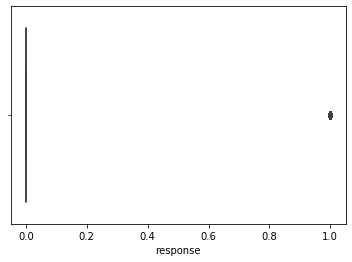

In [66]:
sns.boxplot('response',data=bank)

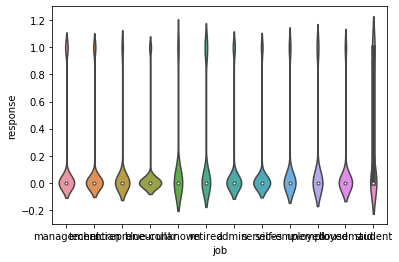

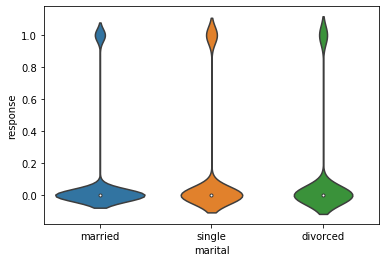

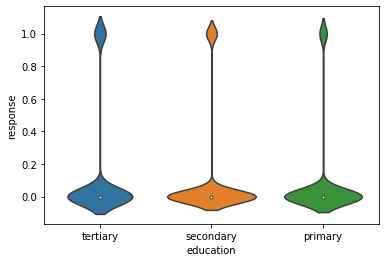

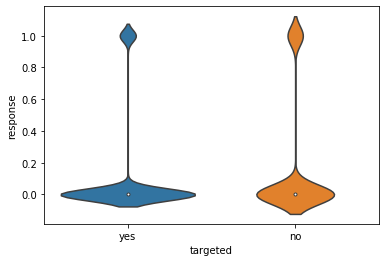

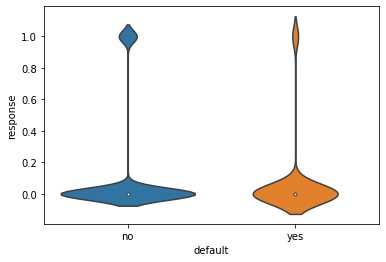

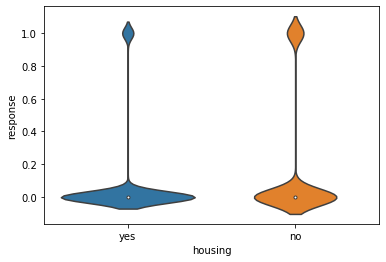

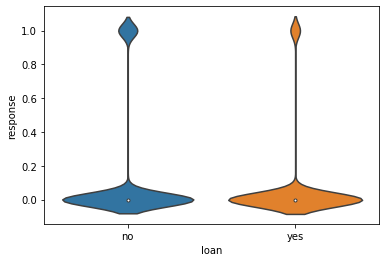

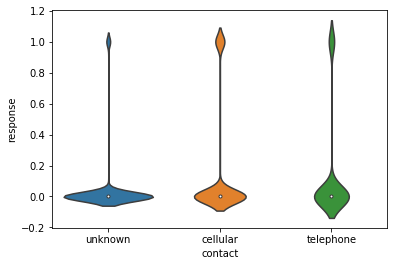

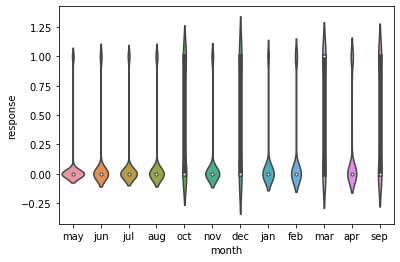

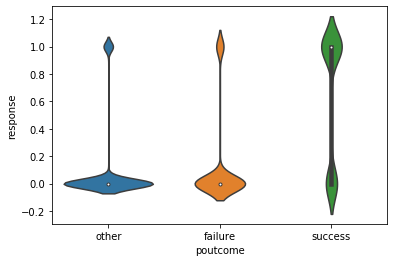

In [67]:
from numpy import median
for i in obj:
    sns.violinplot(bank[i],bank["response"])
    plt.show()

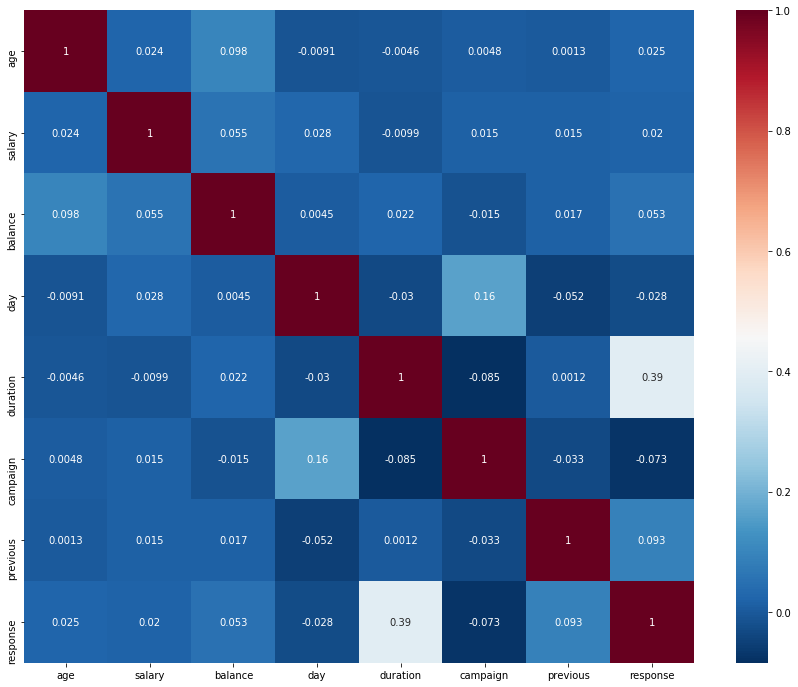

In [68]:
plt.figure(figsize=(15,12))
sns.heatmap(bank.corr(),annot=True,cmap='RdBu_r')

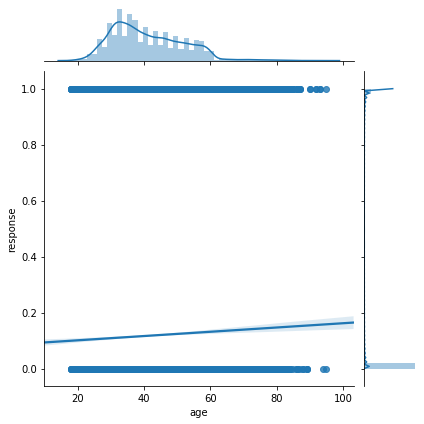

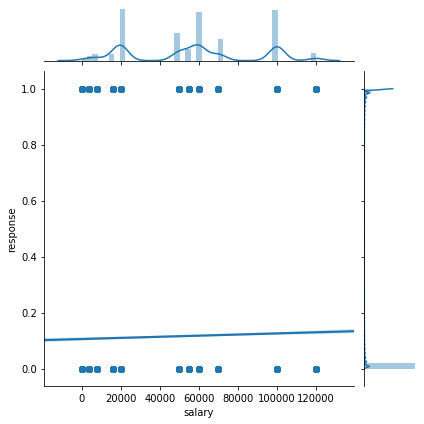

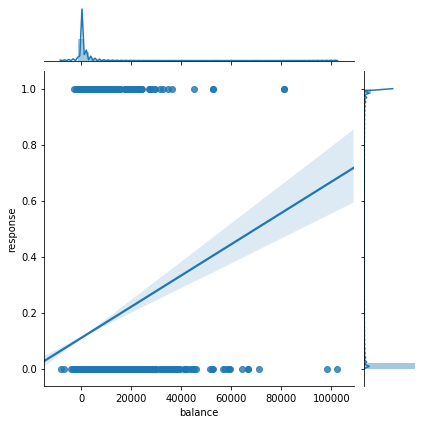

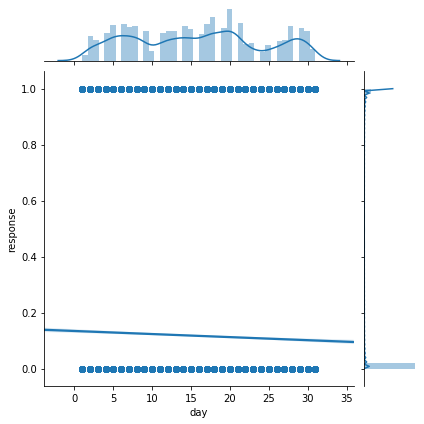

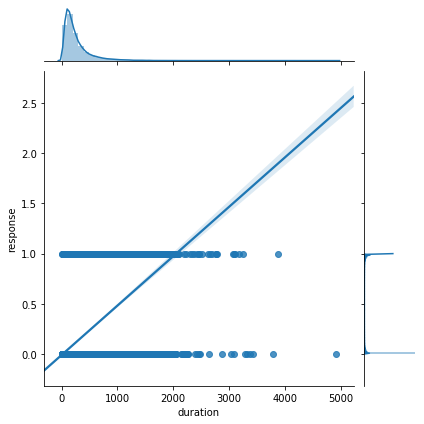

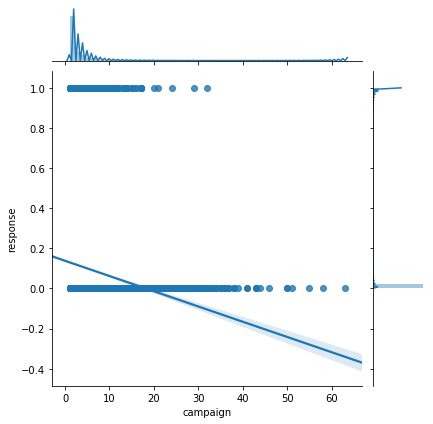

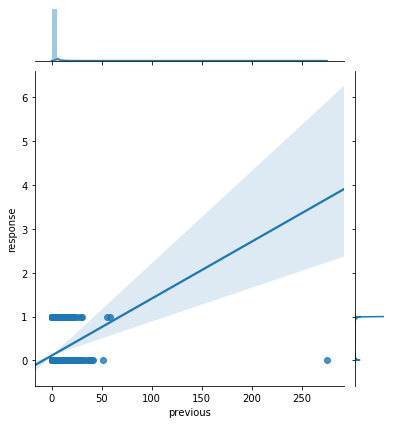

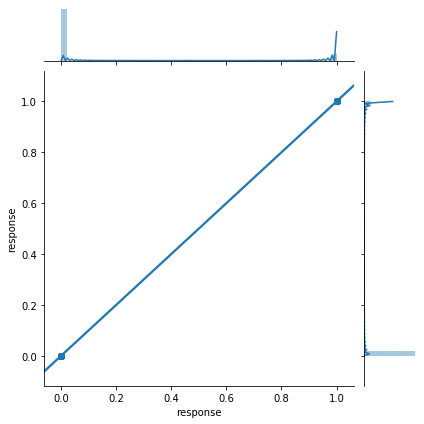

In [69]:
for i in num:
    sns.jointplot(x = bank[i],y = bank["response"],kind='reg')
    plt.show()

The numerical and categorical features seems not to be very highly correlated with the response varibale. Pdays as proved earlier did not have useful data. Poutcome seems to have a lot of unknown values too. 

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bank.drop(["response"],axis=1),bank["response"],test_size = 0.2,random_state=42)
print("Train Data shape ",X_train.shape)
print("Test Data shape ",X_test.shape)

Train Data shape  (36168, 17)
Test Data shape  (9043, 17)


In [134]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown="ignore")
X_train_obj = ohe.fit_transform(X_train[obj])
X_test_obj = ohe.transform(X_test[obj])
print(X_train_obj.shape)
print(X_test_obj.shape)

(36168, 44)
(9043, 44)


In [135]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train[num[:-1]])
X_test = min_max.transform(X_test[num[:-1]])
print(X_train.shape)
print(X_test.shape)

(36168, 7)
(9043, 7)


In [136]:
X_train = pd.DataFrame(X_train,columns=num[:-1])
X_test = pd.DataFrame(X_test,columns=num[:-1])

In [137]:
features = ohe.get_feature_names().tolist()

In [138]:
X_train_obj = pd.DataFrame(X_train_obj,columns= features)
X_test_obj = pd.DataFrame(X_test_obj,columns= features)

In [139]:
X_train = pd.concat([X_train_obj,X_train[num[:-1]]],axis=1)
X_test = pd.concat([X_test_obj,X_test[num[:-1]]],axis=1)
print(X_train.shape)
print(X_test.shape)

(36168, 51)
(9043, 51)


LOGISTIC REGRESSION

In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_train_pred = logreg.predict(X_train)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9020404777704047

In [143]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[31277,   693],
       [ 2850,  1348]], dtype=int64)

In [144]:
y_test_pred = logreg.predict(X_test)

In [145]:
accuracy_score(y_test, y_test_pred)

0.8983744332632976

RFE

In [146]:
from sklearn.feature_selection import RFE

In [165]:
rfe = RFE(estimator=logreg,n_features_to_select=5)
rfe.fit(X_train,y_train)
selected_features = X_train.columns[rfe.ranking_==1]
selected_features

Index(['x9_failure', 'x9_other', 'balance', 'duration', 'campaign'], dtype='object')

Checking VIF and P values

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X_train_sf = sm.add_constant(X_train[selected_features])

In [167]:
pd.Series([variance_inflation_factor(X_train_sf.values, i) 
               for i in range(X_train_sf.shape[1])], 
              index=X_train_sf.columns)

const         42.236303
x9_failure     3.778663
x9_other       3.793182
balance        1.002112
duration       1.010063
campaign       1.019683
dtype: float64

In [168]:
model = sm.OLS(np.array(y_train),X_train_sf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     2295.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:35:59   Log-Likelihood:                -5160.1
No. Observations:               36168   AIC:                         1.033e+04
Df Residuals:                   36162   BIC:                         1.038e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4599      0.010     48.220      0.000       0.441       0.479
x9_failure    -0.4782      0.009    -52.000      0.000      -0.496      -0.460
x9_other      -0.5148      0.008    -62.741      0.000      -0.531      -0.499
balance        0.3735      0.054      6.978      0.000       0.269       0.478
duration       2.3259      0.028     82.368      0.000       2.271       2.381
campaign      -0.1227      0.029     -4.167      0.000      -0.180      -0.065
==============================================================================
Omnibus:                    12909.142   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49243.310
Skew:                           1.775   Prob(JB):                         0.00
Kurtosis:                       7.481   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
X_train_sf = X_train[selected_features]

In [170]:
logreg.fit(X_train_sf,y_train)
y_train_pred = logreg.predict(X_train_sf)
accuracy_score(y_train, y_train_pred)

0.9001603627516036

In [171]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(logreg,X_train_sf,y_train,cv=5,scoring='accuracy').mean())

0.8995521058387468


In [172]:
X_test_sf = X_test[selected_features]
y_test_pred = logreg.predict(X_test_sf)
accuracy_score(y_test, y_test_pred)

0.8961627778392126

In [176]:
confusion_matrix(y_test, y_test_pred)

array([[7780,  172],
       [ 767,  324]], dtype=int64)

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [173]:
# rfe = RFE(estimator=logreg,n_features_to_select=10)
# rfe.fit(X_train,y_train)
# selected_features = X_train.columns[rfe.ranking_==1]
# selected_features

In [174]:
# X_train_sf = sm.add_constant(X_train[selected_features])
# pd.Series([variance_inflation_factor(X_train_sf.values, i) 
#                for i in range(X_train_sf.shape[1])], 
#               index=X_train_sf.columns)

In [175]:
# model = sm.OLS(np.array(y_train),X_train_sf).fit()
# model.summary()

As we can see the P values for all selected features are close to 0 and VIF values are conisderably low. So we can say that there is no existing multi-collinearity. 

RandomForests

In [178]:
feat_labels = [bank.columns]

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(bank.drop(["response"],axis=1),bank["response"],test_size = 0.2,random_state=42)
print("Train Data shape ",X_train.shape)
print("Test Data shape ",X_test.shape)

Train Data shape  (36168, 17)
Test Data shape  (9043, 17)


In [180]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False,handle_unknown="ignore")
X_train_obj = ohe.fit_transform(X_train[obj])
X_test_obj = ohe.transform(X_test[obj])
print(X_train_obj.shape)
print(X_test_obj.shape)

(36168, 44)
(9043, 44)


In [181]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train[num[:-1]])
X_test = min_max.transform(X_test[num[:-1]])
print(X_train.shape)
print(X_test.shape)

(36168, 7)
(9043, 7)


In [182]:
X_train = pd.DataFrame(X_train,columns=num[:-1])
X_test = pd.DataFrame(X_test,columns=num[:-1])

In [183]:
features = ohe.get_feature_names().tolist()

In [184]:
X_train_obj = pd.DataFrame(X_train_obj,columns= features)
X_test_obj = pd.DataFrame(X_test_obj,columns= features)

In [185]:
X_train = pd.concat([X_train_obj,X_train[num[:-1]]],axis=1)
X_test = pd.concat([X_test_obj,X_test[num[:-1]]],axis=1)
print(X_train.shape)
print(X_test.shape)

(36168, 51)
(9043, 51)


In [186]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=16)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [187]:
y_train_pred = rf.predict(X_train)
confusion_matrix(y_train, y_train_pred)
accuracy_score(y_train, y_train_pred)

0.961264100862641

In [188]:
y_test_pred = rf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.900364923144974

In [191]:
rfe = RFE(estimator=rf,n_features_to_select=5)
rfe.fit(X_train,y_train)
selected_features = X_train.columns[rfe.ranking_==1]
selected_features

Index(['x9_success', 'age', 'balance', 'day', 'duration'], dtype='object')

In [192]:
X_train_sf = X_train[selected_features]
rf.fit(X_train_sf,y_train)
y_train_pred = rf.predict(X_train_sf)
accuracy_score(y_train, y_train_pred)

0.9550707808007078

In [193]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,X_train_sf,y_train,cv=5,scoring='accuracy').mean())

0.8982250086299619


In [194]:
X_test_sf = X_test[selected_features]
y_test_pred = rf.predict(X_test_sf)
accuracy_score(y_test, y_test_pred)

0.8930664602454937

In [195]:
confusion_matrix(y_test, y_test_pred)

array([[7691,  261],
       [ 706,  385]], dtype=int64)

In [196]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.60      0.35      0.44      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



1. Which metric did you choose and why?

A. I chose the top 5 metrics suggested by rfe. Then I checked for multicollinearity to see if the predictors could be described by one another. Since there was no existing multi-collinearity I went ahead with these suggested predictor variables. Poutcome had to be used as it was directly related to the response. The poutcome column indicated success or failure of the previous marketing campaign. 

2. Which model has better performance on the test set?

A. Both the models have performed equally well on the test set.

3. Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

A. Two of the top features were the same for both models. Duration and balance were the two common features from both the models. 


We can say that the features best defining the dataset is duration and balance. 